In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create a set of random latitude and longitude combinations.
# Set Variables to hold the results
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Use the zip function to pack the lats and lngs as pairs
lat_lngs = zip(lats, lngs)

In [18]:
# Add the latitudes and longitudes to a list.
# Can only unzip a zipped tuple once before it is removed from the computer's memory. 
coordinates = list(lat_lngs)

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
# Add a try-except block to prevent API request from stopping prematurely
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    #Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cayenne
Processing Record 2 of Set 1 | nur
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | cerrito
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | moron
Processing Record 22 of Set 1 | punta aren

Processing Record 34 of Set 4 | viedma
Processing Record 35 of Set 4 | quatre cocos
Processing Record 36 of Set 4 | frontera
Processing Record 37 of Set 4 | jizan
Processing Record 38 of Set 4 | puerto ayora
Processing Record 39 of Set 4 | east london
Processing Record 40 of Set 4 | winslow
Processing Record 41 of Set 4 | longonjo
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | balykshi
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | sicuani
Processing Record 46 of Set 4 | porto velho
Processing Record 47 of Set 4 | tingrela
City not found. Skipping...
Processing Record 48 of Set 4 | warqla
City not found. Skipping...
Processing Record 49 of Set 4 | moindou
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | pingliang
Processing Record 3 of Set 5 | goundi
Processing Record 4 of Set 5 | yabrud
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | hakodate
P

Processing Record 24 of Set 8 | ostersund
Processing Record 25 of Set 8 | bereda
Processing Record 26 of Set 8 | vestmanna
Processing Record 27 of Set 8 | faanui
Processing Record 28 of Set 8 | lukovetskiy
Processing Record 29 of Set 8 | maniitsoq
Processing Record 30 of Set 8 | fukue
Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | vrangel
Processing Record 33 of Set 8 | berezovyy
Processing Record 34 of Set 8 | alta floresta
Processing Record 35 of Set 8 | luwingu
Processing Record 36 of Set 8 | xichang
Processing Record 37 of Set 8 | korla
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | gobabis
Processing Record 40 of Set 8 | othonoi
City not found. Skipping...
Processing Record 41 of Set 8 | partenit
Processing Record 42 of Set 8 | cherskiy
Processing Record 43 of Set 8 | weston
Processing Record 44 of Set 8 | victoria
Processing Record 45 of Set 8 | chernyshevskiy
Processing Record 46 of Set 8 | floro
Processing Record 47

Processing Record 12 of Set 12 | san jose
Processing Record 13 of Set 12 | manali
Processing Record 14 of Set 12 | college
Processing Record 15 of Set 12 | kalabo
Processing Record 16 of Set 12 | atwater
Processing Record 17 of Set 12 | islamkot
Processing Record 18 of Set 12 | tanout
Processing Record 19 of Set 12 | kaniama
Processing Record 20 of Set 12 | mahanje
Processing Record 21 of Set 12 | oga
Processing Record 22 of Set 12 | saint-francois
Processing Record 23 of Set 12 | mashhad
Processing Record 24 of Set 12 | fortuna
Processing Record 25 of Set 12 | shurugwi
Processing Record 26 of Set 12 | paita
Processing Record 27 of Set 12 | tunduru
City not found. Skipping...
Processing Record 28 of Set 12 | kamina
Processing Record 29 of Set 12 | sainte-marie
Processing Record 30 of Set 12 | shache
Processing Record 31 of Set 12 | prince rupert
Processing Record 32 of Set 12 | livny
Processing Record 33 of Set 12 | falun
Processing Record 34 of Set 12 | zafra
Processing Record 35 of S

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cayenne,GF,2022-05-09 20:26:45,4.9333,-52.3333,84.24,1,75,11.50
1,Nur,PL,2022-05-09 20:31:29,52.6683,22.3221,42.39,67,56,5.53
2,Albany,US,2022-05-09 20:31:30,42.6001,-73.9662,73.33,17,0,9.78
3,Nemuro,JP,2022-05-09 20:31:31,43.3236,145.5750,44.80,67,42,22.97
4,Cerrito,CO,2022-05-09 20:31:32,6.8432,-72.6940,60.55,89,100,0.63
5,Ushuaia,AR,2022-05-09 20:31:32,-54.8000,-68.3000,44.22,81,20,19.57
6,Sao Filipe,CV,2022-05-09 20:31:33,14.8961,-24.4956,72.68,81,20,9.75
7,Clyde River,CA,2022-05-09 20:31:33,70.4692,-68.5914,23.23,86,100,29.93
8,Pevek,RU,2022-05-09 20:31:33,69.7008,170.3133,26.55,80,99,8.34
9,Hithadhoo,MV,2022-05-09 20:31:34,-0.6000,73.0833,84.52,77,72,21.34


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import time module
import time

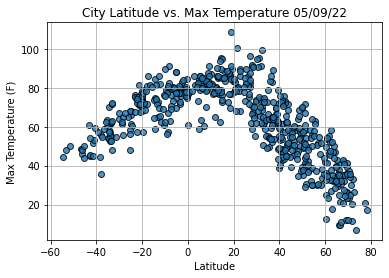

In [32]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

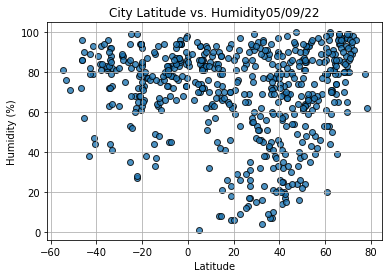

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

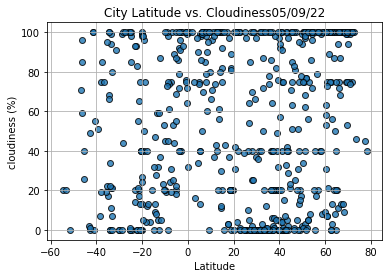

In [35]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

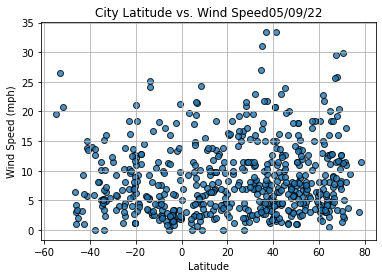

In [36]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Use the loc method using the index and saving to a new variable
index13 = city_data_df.loc[13]
index13

City                   Kaitangata
Country                        NZ
Date          2022-05-09 20:31:36
Lat                      -46.2817
Lng                      169.8464
Max Temp                     46.0
Humidity                       86
Cloudiness                     59
Wind Speed                   4.29
Name: 13, dtype: object

In [39]:
# Filter DataFrame based on the value of a row
# Check for hemisphere by checking if value is positive or negative
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
568     True
569    False
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [41]:
# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cayenne,GF,2022-05-09 20:26:45,4.9333,-52.3333,84.24,1,75,11.50
1,Nur,PL,2022-05-09 20:31:29,52.6683,22.3221,42.39,67,56,5.53
2,Albany,US,2022-05-09 20:31:30,42.6001,-73.9662,73.33,17,0,9.78
3,Nemuro,JP,2022-05-09 20:31:31,43.3236,145.5750,44.80,67,42,22.97
4,Cerrito,CO,2022-05-09 20:31:32,6.8432,-72.6940,60.55,89,100,0.63


In [43]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Ushuaia,AR,2022-05-09 20:31:32,-54.8000,-68.3000,44.22,81,20,19.57
9,Hithadhoo,MV,2022-05-09 20:31:34,-0.6000,73.0833,84.52,77,72,21.34
12,Rikitea,PF,2022-05-09 20:31:35,-23.1203,-134.9692,76.12,68,14,10.22
13,Kaitangata,NZ,2022-05-09 20:31:36,-46.2817,169.8464,46.00,86,59,4.29
14,Busselton,AU,2022-05-09 20:31:36,-33.6500,115.3333,55.24,88,21,2.42


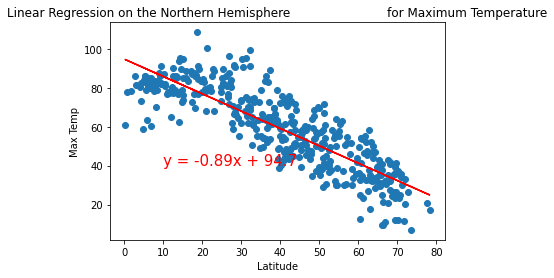

In [44]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

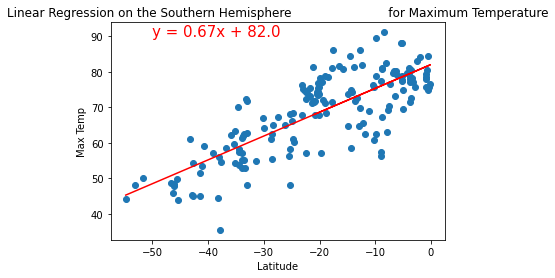

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

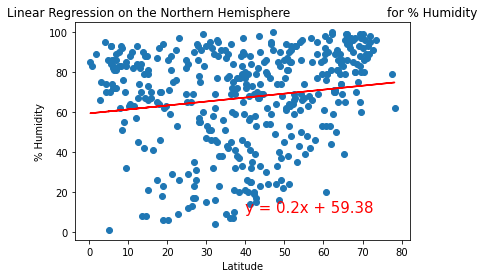

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

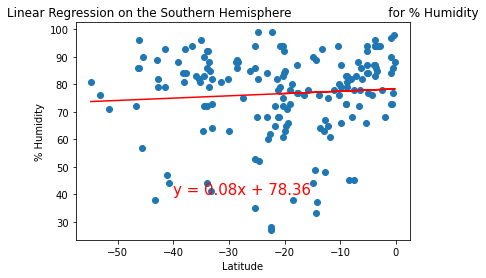

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,40))

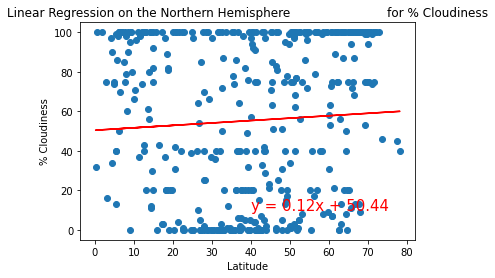

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

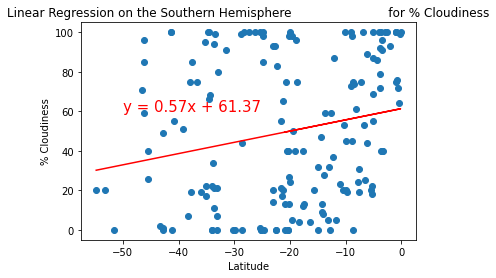

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

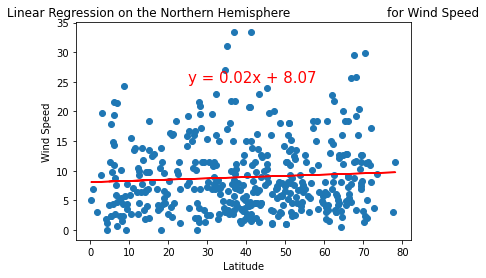

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(25,25))

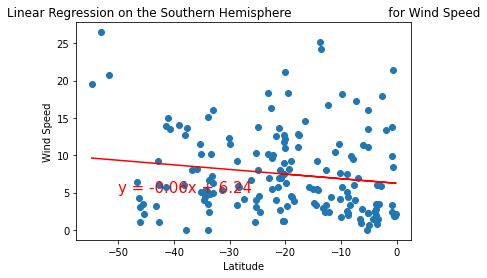

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,5))